In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [69]:
data = np.genfromtxt("hw03_data_set_images.csv", delimiter = ",")
labels = np.genfromtxt("hw03_data_set_labels.csv", dtype=str)
print(data.shape)
print(labels.shape)

(195, 320)
(195,)


In [70]:
labels.shape

(195,)

In [71]:
#create empty matrixes with the dim of train and test data sets
train_data = np.zeros((125,320))  
test_data = np.zeros((70,320))
train_labels = np.zeros(125)
test_labels = np.zeros(70)

In [72]:
train_data.shape

(125, 320)

In [73]:
for i in range(0,5):  #there are 5 classes
    train_data[25*i:(25+25*i),:] = data[(39*i):(25+39*i),:]   # take the first 25 values of each 39 data as training data
    test_data[14*i:(14+14*i),:] = data[(25+i*39):39*(i+1),:]  # take the last 14 values of each 39 data as test data
    train_labels[25*i:(25+25*i)] = labels[(39*i):(25+39*i)]   # take the first 25 values of each 39 labels as training labels
    test_labels[14*i:(14+14*i)] = labels[(25+i*39):39*(i+1)]  # take the last 14 values of each 39 labels as test labels

In [74]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(125, 320)
(70, 320)
(125,)
(70,)


In [75]:
train_data.shape

(125, 320)

In [76]:
# get number of classes and number of samples
K = int(np.max(train_labels))
N = train_data.shape[0]  #125 data
D= train_data.shape[1]  # 320 dimention

# one-of-K encoding
#Y_truth = np.zeros((N, K)).astype(int)
#Y_truth[range(N), y_truth - 1] = 1   #y_truth is either 1, 2 or 3

print(K,N,D)
#print(Y_truth)

5 125 320


In [77]:
#define sigmoid function
def sigmoid(W, x, wo):
    return 1/(1 + np.exp(-(np.matmul(x, W) + w0)))

In [90]:
#set the parameters
eta = 0.001
epsilon = 0.001

In [91]:
(train_data.shape[1],K)

(320, 5)

In [92]:
#randomly initalize W and w0 
W = np.random.uniform(low = -0.01, high = 0.01, size = (train_data.shape[1],K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))
print(W.shape)
print(w0.shape)

(320, 5)
(1, 5)


In [93]:
# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((y_truth[:,c] - y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(5)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(y_truth - y_predicted, axis = 0))

In [94]:
def gen_y_truth(test_labels):
    val = np.zeros((test_labels.shape[0], 5))
    for i in range(test_labels.shape[0]):
        if test_labels[i] == 1:
            val[i][0] = 1
        elif test_labels[i] == 2:
            val[i][1] = 1
        elif test_labels[i] == 3:
            val[i][2] = 1
        elif test_labels[i] == 4:
            val[i][3] = 1
        elif test_labels[i] == 5:
            val[i][4] = 1
    return val

In [95]:
gen_y_truth(train_labels).shape

(125, 5)

In [96]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
y_truth = gen_y_truth(train_labels)

while 1:
    y_predicted = sigmoid(W, train_data, w0)
    objective_values = np.append(objective_values, 1/2*np.sum((y_truth-y_predicted)**2))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(train_data, y_truth, y_predicted)
    w0 = w0 - eta * gradient_w0(y_truth, y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break
    iteration = iteration + 1

In [106]:
print(W)
print(w0)

[[-0.01248877 -0.12202349 -0.02330646  0.25957089 -0.05144583]
 [-0.13809323  0.0133456  -0.25784647  0.41907173  0.08381588]
 [-0.16252193  0.15206485 -0.27484967  0.31900074  0.07674089]
 ...
 [ 0.07239804  0.28651049  0.08991699 -0.29956265 -0.25048078]
 [ 0.13500061 -0.35475588  0.08569882 -0.3755119  -0.01390127]
 [ 0.15955649 -0.52150218  0.17763068 -0.32335256 -0.02200793]]
[[-0.11543911 -0.37997204  0.00094955 -0.05458442 -0.34358864]]


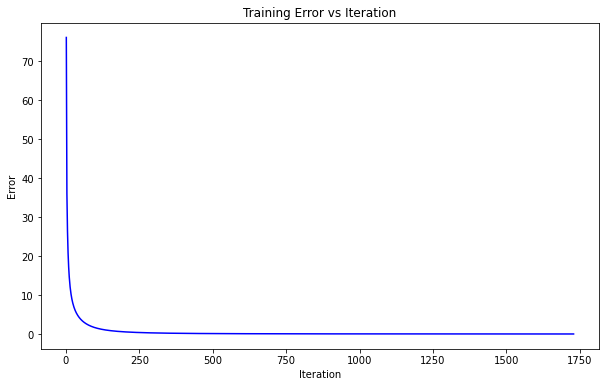

In [97]:
#visualize, we have more than 1700 iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "b-")
plt.title("Training Error vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [110]:
y_predicted_classes = np.argmax(y_predicted, axis = 1) + 1
y_truth_classes = np.argmax(y_truth, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted_classes, y_truth_classes, rownames = ['y_predicted'], colnames = ['y_truth'])
print("Confusion matrix for training dataset")
print(confusion_matrix)

Confusion matrix for training dataset
y_truth       1   2   3   4   5
y_predicted                    
1            25   0   0   0   0
2             0  25   0   0   0
3             0   0  25   0   0
4             0   0   0  25   0
5             0   0   0   0  25


In [108]:
learned_w = W
learned_w0 = w0

In [109]:
test_results = sigmoid(learned_w, test_data, learned_w0)
test_truth = gen_y_truth(test_labels)

test_results_classes = np.argmax(test_results, axis = 1) + 1
test_truth_classes = np.argmax(test_truth, axis = 1) + 1

confusion_matrix = pd.crosstab(test_results_classes, test_truth_classes, rownames = ['y_predicted'], colnames = ['y_test'])
print("Confusion matrix for test dataset")
print(confusion_matrix)

Confusion matrix for test dataset
y_test        1   2   3   4   5
y_predicted                    
1            13   1   0   0   0
2             1  11   0   0   2
3             0   0  14   0   0
4             0   0   0  14   0
5             0   2   0   0  12
